In [ ]:
# check DOCUMENT_SUBMISSION


In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth',-1)

from sklearn.datasets import load_boston
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
import joblib
import pickle

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier

from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression

from imblearn.over_sampling import SMOTENC

from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [50]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', 500)

In [24]:
train.head()

NameError: name 'train' is not defined

In [60]:
train=pd.read_csv('/Users/st/Desktop/Project Datasets/home-credit-default-risk/Cleaned files/application_train_clean19')


In [56]:
ip=pd.read_csv('/Users/st/Desktop/Project Datasets/home-credit-default-risk/Cleaned files/\
installment_payments_clean19')

In [57]:
pa=pd.read_csv('/Users/st/Desktop/Project Datasets/home-credit-default-risk/Cleaned files/prev_app_clean19')
# pa.drop(['SK_ID_PREV'],inplace=True,axis=1)

In [58]:
bureau=pd.read_csv('/Users/st/Desktop/Project Datasets/home-credit-default-risk/Cleaned files/bureau19')

In [59]:
cc=pd.read_csv('/Users/st/Desktop/Project Datasets/home-credit-default-risk/Cleaned files/cc_bal_clean19')
# cc.drop(['SK_ID_PREV'],inplace=True,axis=1)

In [61]:
merged=train.merge(ip,how='inner',left_on='SK_ID_CURR', right_on='SK_ID_CURR')
merged.shape

(291643, 53)

In [62]:
merged=merged.merge(pa,how='inner',left_on='SK_ID_CURR', right_on='SK_ID_CURR')
merged.shape

(290131, 202)

In [63]:
merged=merged.merge(bureau,how='inner',left_on='SK_ID_CURR', right_on='SK_ID_CURR')
merged.shape

(248721, 239)

In [64]:
merged=merged.merge(cc,how='inner',left_on='SK_ID_CURR', right_on='SK_ID_CURR')
merged.shape

(74472, 273)

In [65]:
# merge_obj=merged1.select_dtypes(include=['float64'])

merged1=merged.copy()
# merged1.drop(['Unnamed: 0'],inplace=True,axis=1)

In [35]:
# merged1.fillna(0,inplace=True)
# [col for col in merged1.columns]

# merged1=pd.read_csv('merged1')

In [66]:
merged1.isnull().sum().sum()


0

In [37]:
# # saving on file size by type conversion
# for i in range(len(merged1.dtypes)):
#     if merged1.dtypes[i]=='int64':
#         merged1[merged1.columns[i]]=merged1[merged1.columns[i]].astype(float).astype(float)
merged1.ACCOMPANIED_PA.value_counts()

merged1[[col for col in merged1.columns if 'ACCOMPANIED' in col]]

,ACCOMPANIED,ACCOMPANIED_PA
0,1,0.250000
1,0,0.500000
2,1,0.375000
3,0,0.222222
4,0,0.666667
...,...,...
74467,0,0.333333
74468,0,0.000000
74469,0,0.055556
74470,0,0.000000


In [12]:
cor=merged1.corr()

In [13]:
corcol=cor.iloc[:,2:][cor>0.2].columns
corcol1=np.array(corcol.append(cor.columns[:2]))

In [14]:
merged1=merged1[corcol1]
merged1.head()
merged1.shape

(74472, 258)

In [15]:
# obj_df["OHC_Code"] = np.where(obj_df["engine_type"].str.contains("ohc"), 1, other=0)


# merged.iloc[:,(np.where(merged1.columns.str.contains("_AVG"),1,0))]

# merged1

# df=merged1.select_dtypes(include=['float64'])

# df[df_float.columns[df_float.columns.str.contains("AMT")]]

In [16]:
# merged1[merged1.columns[merged1.columns.str.contains('REGION')]]

# # merged1.CNT_CHILDREN.value_counts()

# merged1.DAYS_FIRST_DRAWING.value_counts()

In [17]:
# merged1.dtypes

In [18]:
merged1.isnull().sum().sum()

0

In [67]:

merged1.REGION_POPULATION_RELATIVE= merged1.REGION_POPULATION_RELATIVE.apply(lambda x:'LOW' if x<0.010006 
                                                                             else('HIGH' if x>0.028663 else 'MED'))

merged1.CNT_CHILDREN= merged1.CNT_CHILDREN.apply(lambda x:'LOW' if x<=0 
                                                 else('HIGH' if x>2 else 'MED'))

merged1.DAYS_REGISTRATION= merged1.DAYS_REGISTRATION.apply(lambda x:'OLD' if x<=-7489 
                                                           else('NEW' if x>-2029 else 'MID'))

# merged1.EXT_SOURCE_1= merged1.EXT_SOURCE_1.apply(lambda x:'LOW' if x<0.502130
#                                                  else('HIGH' if x>0.502130 else 'MED'))

merged1.DAYS_EMPLOYED= merged1.DAYS_EMPLOYED.apply(lambda x:'HIGH' if x<-3072
                                                 else('LOW' if x>-460 else 'MED'))

merged1.DEF_60_CNT_SOCIAL_CIRCLE= merged1.DEF_60_CNT_SOCIAL_CIRCLE.apply(lambda x:'LOW' if x<0.101120
                                                 else('HIGH' if x>5 else 'MED'))

merged1.RATE_INTEREST_PRIMARY= merged1.RATE_INTEREST_PRIMARY.apply(lambda x:'LOW' if x<0.188730
                                                                   else('HIGH' if x>0.188730 else 'MED'))


merged1.RATE_DOWN_PAYMENT= merged1.RATE_DOWN_PAYMENT.apply(lambda x:'LOW' if x<0.000000
                                                                   else('HIGH' if x>0.108909 else 'MED'))


merged1.REGION_RATING_CLIENT=merged1.REGION_RATING_CLIENT.astype('object')
merged1.REGION_RATING_CLIENT_W_CITY=merged1.REGION_RATING_CLIENT_W_CITY.astype('object')
merged1.REG_REGION_NOT_LIVE_REGION=merged1.REG_REGION_NOT_LIVE_REGION.astype('object')
merged1.LIVE_REGION_NOT_WORK_REGION=merged1.LIVE_REGION_NOT_WORK_REGION.astype('object')
merged1.REG_REGION_NOT_WORK_REGION=merged1.REG_REGION_NOT_WORK_REGION.astype('object')

# mostly nans
# merged1.drop(['DAYS_FIRST_DRAWING','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START'],inplace=True,axis=1)


# merged1.REGION_POPULATION_RELATIVE.value_counts()

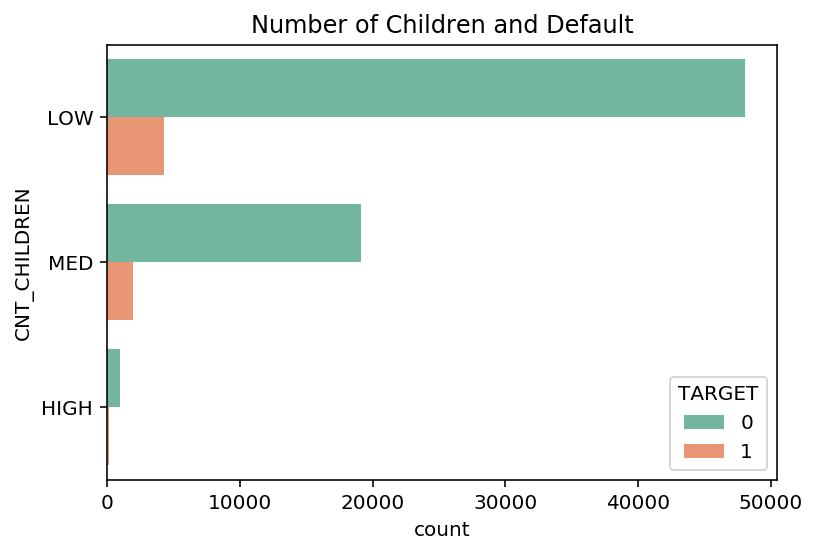

In [40]:
ax = sns.countplot(y='CNT_CHILDREN', hue='TARGET',data=merged1,orient='v', palette='Set2').set_title('Number of Children and Default')


In [6]:
pd.read_csv('score_sheet.csv')

,Accuracy Score,Model,Recall Score
0,0.915888,LogisticRegression(),0.034177
1,0.700451,"Pipeline(steps=[('over', SMOTE(sampling_strategy='minority')),\n ('pca', PCA(n_components=64)),\n ('model',\n LogisticRegression(C=21.54434690031882, max_iter=1000,\n tol=0.1))])",0.691139
2,0.700451,"Pipeline(steps=[('over', SMOTE(sampling_strategy='minority')),\n ('pca', PCA(n_components=64)),\n ('model',\n LogisticRegression(C=21.54434690031882, max_iter=1000,\n tol=0.1))])",0.691139
3,0.700183,"Pipeline(steps=[('over', SMOTE(sampling_strategy='minority')),\n ('pca', PCA(n_components=78)),\n ('model',\n LogisticRegression(C=21.54434690031882, max_iter=1000,\n tol=0.1))])",0.685443
4,0.709475,"Pipeline(steps=[('over', SMOTE(sampling_strategy='minority')),\n ('pca', PCA(n_components=120)),\n ('model', LogisticRegression(C=60, max_iter=1000, tol=0.1))])",0.686076
5,0.711193,"Pipeline(steps=[('over', SMOTE(sampling_strategy='minority')),\n ('pca', PCA(n_components=150)),\n ('model', LogisticRegression(C=75, max_iter=1000, tol=0.1))])",0.682278
6,0.914975,"MLPClassifier(activation='identity', alpha=1e-10, hidden_layer_sizes=3,\n random_state=1, solver='lbfgs')",0.030380
7,0.707058,"Pipeline(steps=[('over', SMOTE(sampling_strategy='minority')),\n ('pca', PCA(n_components=80)),\n ('model',\n MLPClassifier(alpha=3.162277660168379e-06,\n hidden_layer_sizes=5, random_state=1,\n solver='sgd'))])",0.595570
8,0.798904,"Pipeline(steps=[('over', SMOTE(sampling_strategy='minority')),\n ('model',\n GradientBoostingClassifier(criterion='mse', learning_rate=0.2,\n loss='exponential',\n n_estimators=500,\n n_iter_no_change=20,\n random_state=1))])",0.394937


In [39]:
# merged1.set_index('SK_ID_CURR',inplace=True)

In [68]:
# infinite values 
merged1=merged1.replace([np.inf, -np.inf], 0)

In [69]:
# merged1.to_csv('merged1', index=False)

In [71]:
data=merged1.copy()
y=data['TARGET']
data.drop(['TARGET'],inplace=True,axis=1)

object_col=data.select_dtypes(include=['object']).columns
col_not_obj=[col for col in data.columns if col not in object_col]

X=pd.get_dummies(data,columns=object_col, drop_first=True)

smote_obj_cols=[col for col in X.columns if col not in col_not_obj]



X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y)

scaler=StandardScaler()
Xs_train=scaler.fit_transform(X_train)
Xs_test=scaler.transform(X_test)

kf = KFold(n_splits=5, random_state=42, shuffle=False)


min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)

X_test_minmax=min_max_scaler.transform(X_test)


/Users/st/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [38]:
pca = PCA(n_components=20)
pca.fit(X)

In [39]:
lr=LogisticRegression(solver='lbfgs')
lr.fit(X_train_minmax,y_train)
predictions = lr.predict(X_test_minmax)

print('accuracy score', accuracy_score(y_test,predictions))
print('precision score', precision_score(y_test,predictions))
print('recall score', recall_score(y_test,predictions))
print('\nclassification_report: ')
print(classification_report(y_test, predictions, digits=4))
print('\nconfusion_matrix')
print(confusion_matrix(y_test, predictions, labels=[1, 0]))


model_used=lr
recall=recall_score(y_test,predictions)
accuracy=accuracy_score(y_test,predictions)

# score_model=[]
# score_model=pd.DataFrame({'Model':model_used,'Accuracy Score': accuracy,'Recall Score':recall },index=[0])
# score_model
# # score_model.to_csv('score_sheet')

accuracy score 0.9148136212267698
precision score 0.4716981132075472
recall score 0.03164556962025317

classification_report: 
              precision    recall  f1-score   support

           0     0.9174    0.9967    0.9554     17038
           1     0.4717    0.0316    0.0593      1580

    accuracy                         0.9148     18618
   macro avg     0.6945    0.5142    0.5073     18618
weighted avg     0.8795    0.9148    0.8793     18618


confusion_matrix
[[   50  1530]
 [   56 16982]]


/Users/st/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [91]:
# defininig a function to keep scores
score_model = pd.read_csv('score_sheet')
def add_score(model, model_name=score_model):
    
    p=pd.DataFrame({'Model':model_used,'Accuracy Score':accuracy,'Recall Score':recall, 'Precision Score':precision_score(y_test,predictions)},index=[len(model_name)])
    
    return pd.concat([score_model,p])


# Using Adaboost

In [ ]:
model = LogisticRegression(max_iter=1000, tol=0.1,class_weight=21.54434690031882) 

pca = PCA()

over = SMOTE(sampling_strategy='minority')

# under = RandomUnderSampler(sampling_strategy=0.5)

steps = [('over', over), ('pca', pca), ('model', model)]

pipeline = Pipeline(steps=steps),


param_grid = {
    'pca__n_components': [150],
}
# np.logspace(-4, 4, 4)

# search = GridSearchCV(pipeline, param_grid)   

base_estimator = DecisionTreeClassifier(max_depth=3)

model = AdaBoostClassifier(base_estimator=base_estimator,
                           n_estimators=100,
                           random_state=1)
model.fit(X_train, y_train)


# - SMOTE due to class imbalance + logistic regression

In [141]:
# Models=[RandomForestClassifier(), ]

In [135]:
# grid search k value for SMOTE oversampling for imbalanced classification
    
model = LogisticRegression(max_iter=1000,C=)

over = SMOTE(sampling_strategy='minority')

# under = RandomUnderSampler(sampling_strategy=0.5)

steps = [('over', over), ('model', model)]

pipeline = Pipeline(steps=steps)

# evaluate pipeline

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)

# scores = cross_val_score(pipeline, X_train_minmax, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# score = mean(scores)

# print(score)

In [137]:
pipeline.fit(X_train_minmax,y_train)

Pipeline(steps=[('over', SMOTE(sampling_strategy='minority')),
                ('model', LogisticRegression(max_iter=1000))])

In [ ]:
predictions = pipeline.predict(X_test_minmax)

print('accuracy score', accuracy_score(y_test,predictions))
print('precision score', precision_score(y_test,predictions))
print('recall score', recall_score(y_test,predictions))
print('\nclassification_report: ')
print(classification_report(y_test, predictions, digits=4))
print('\nconfusion_matrix')
print(confusion_matrix(y_test, predictions, labels=[1, 0]))


# model updation
model_used=[pipeline.steps]
recall=recall_score(y_test,predictions)
accuracy=accuracy_score(y_test,predictions)

score_model=add_score(model)
score_model

# score_model.to_csv('score_sheet')

In [68]:
f=pd.DataFrame(model.coef_, columns=X_train.columns).T
f.sort_values(by=0).plot(kind='barh',figsize=(20,80));


AttributeError: 'LogisticRegression' object has no attribute 'coef_'

# - Bagging with RandomForest classifier

In [161]:
classifier = RandomForestClassifier()
classifier.fit(X_train_minmax,y_train)

RandomForestClassifier()

In [183]:
Bag=BaggingClassifier(classifier,n_estimators=100,max_samples=1.0,max_features=0.8,random_state=1)

In [72]:
# print(Bag.fit(X_train_minmax,y_train))
# print(Bag.score(X_train_minmax,y_train))
# print(Bag.score(X_test_minmax,y_test))

In [ ]:
model = Bag

over = SMOTE(sampling_strategy='minority')

# under = RandomUnderSampler(sampling_strategy=0.5)

steps = [('over', over), ('model', model)]

pipeline = Pipeline(steps=steps)

# evaluate pipeline

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)


In [ ]:
predictions = pipeline.predict(X_test_minmax)

print('accuracy score', accuracy_score(y_test,predictions))
print('precision score', precision_score(y_test,predictions))
print('recall score', recall_score(y_test,predictions))
print('\nclassification_report: ')
print(classification_report(y_test, predictions, digits=4))
print('\nconfusion_matrix')
print(confusion_matrix(y_test, predictions, labels=[1, 0]))


# - GridSearch CV

In [30]:
# model = GridSearchCV(LogisticRegression(max_iter=10000, tol=0.1),
#                      param_grid={'logisticregression__C': [0.1, 10.]},
#                      cv=2, refit=True)

model = LogisticRegression(max_iter=1000, tol=0.1,class_weight=) 

pca = PCA()

over = SMOTE(sampling_strategy='minority')

# under = RandomUnderSampler(sampling_strategy=0.5)

steps = [('over', over), ('pca', pca), ('model', model)]

pipeline = Pipeline(steps=steps),


param_grid = {
    'pca__n_components': [150],
    'model__C': [75],
}
# np.logspace(-4, 4, 4)
search = GridSearchCV(pipeline, param_grid)    
    
# evaluate pipeline

# cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)

In [282]:
search.fit(X_train_minmax,y_train)

GridSearchCV(estimator=Pipeline(steps=[('over',
                                        SMOTE(sampling_strategy='minority')),
                                       ('pca', PCA()),
                                       ('model',
                                        LogisticRegression(max_iter=1000,
                                                           tol=0.1))]),
             param_grid={'model__C': [75], 'pca__n_components': [150]})

In [58]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.694):
{'model__C': 60, 'pca__n_components': 120}


In [242]:
# score_model=[]
# score_model=pd.DataFrame({'Model':model_used,'Accuracy Score': accuracy,'Recall Score':recall },index=[0])
# score_model
# score_model.to_csv('score_sheet')

NameError: name 'GridsearchCV' is not defined

In [284]:
predictions = search.predict(X_test_minmax)

print('accuracy score', accuracy_score(y_test,predictions))
print('precision score', precision_score(y_test,predictions))
print('recall score', recall_score(y_test,predictions))
print('\nclassification_report: ')
print(classification_report(y_test, predictions, digits=4))
print('\nconfusion_matrix')
print(confusion_matrix(y_test, predictions, labels=[1, 0]))

model_used=[search.best_estimator_]
recall=recall_score(y_test,predictions)
accuracy=accuracy_score(y_test,predictions)

score_model=add_score(model)
score_model

# score_model.to_csv('score_sheet')

accuracy score 0.7111934686862177
precision score 0.18108516714261716
recall score 0.6822784810126582

classification_report: 
              precision    recall  f1-score   support

           0     0.9604    0.7139    0.8190     17038
           1     0.1811    0.6823    0.2862      1580

    accuracy                         0.7112     18618
   macro avg     0.5707    0.6981    0.5526     18618
weighted avg     0.8942    0.7112    0.7738     18618


confusion_matrix
[[ 1078   502]
 [ 4875 12163]]


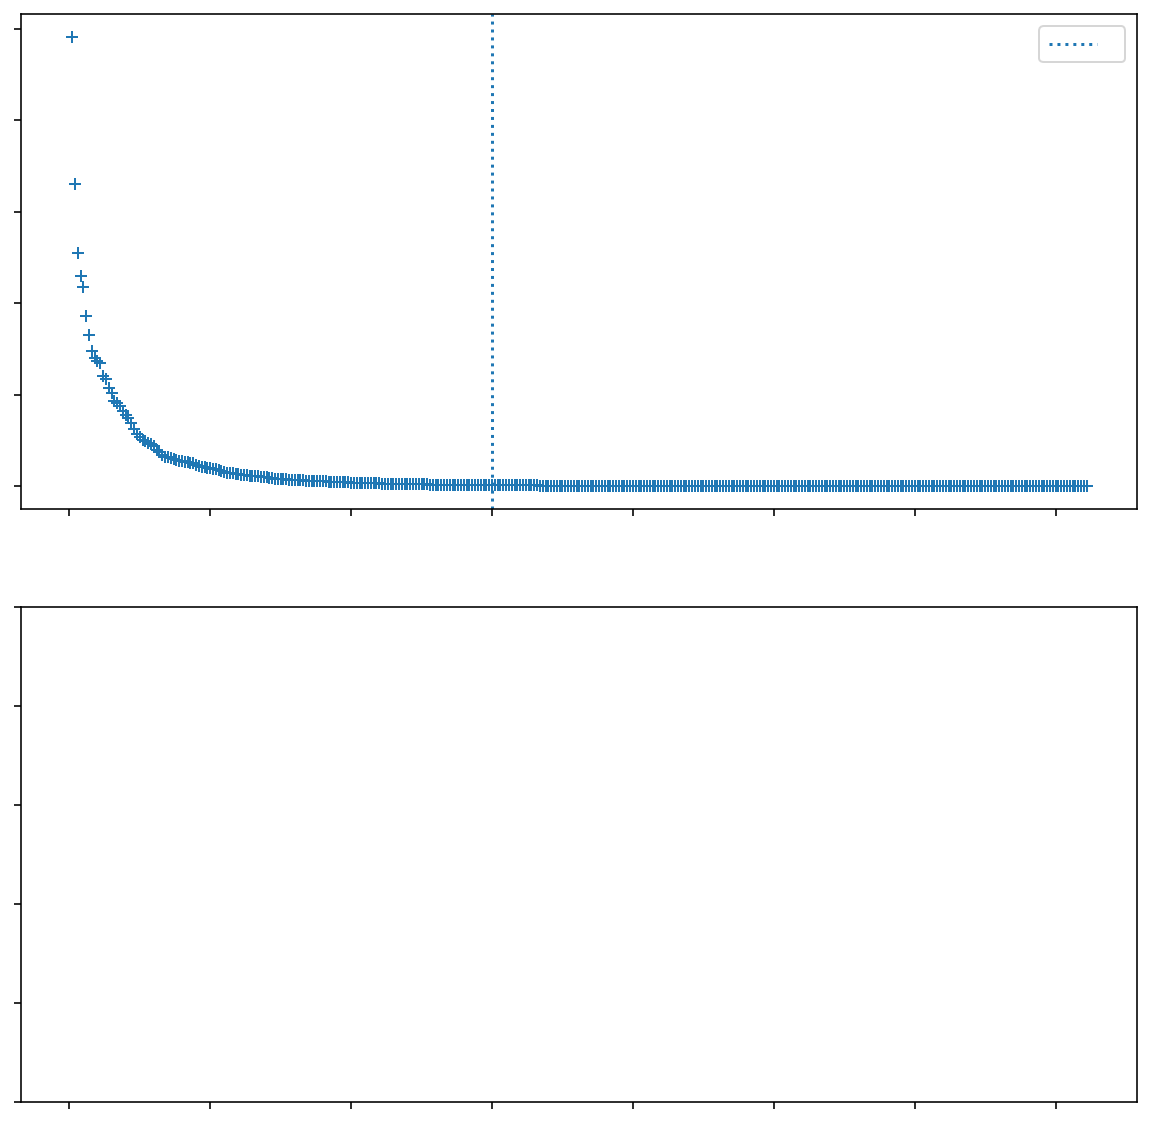

In [294]:
# Plot the PCA spectrum
pca.fit(X_train_minmax)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(10, 10))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12));

In [293]:
pca.n_components_

361

In [271]:
np.logspace(-4, 4, 4)

array([1.00000000e-04, 4.64158883e-02, 2.15443469e+01, 1.00000000e+04])

In [73]:
# score_model.drop(score_model.index[[5,6]],inplace=True)
# score_model=add_score(model)
# score_model

# Trying SMOTENC since there are many categorical features#

In [74]:
# # model updation
# model_used=[pipeline.steps]
# recall=recall_score(y_test,predictions)
# accuracy=accuracy_score(y_test,predictions)

# score_model=add_score(model)

data=merged1.copy()
y=data['TARGET']
data.drop(['TARGET'],inplace=True,axis=1)

object_col=data.select_dtypes(include=['object']).columns
col_not_obj=[col for col in data.columns if col not in object_col]

X=pd.get_dummies(data,columns=object_col, drop_first=True)

# object features which will be dummified  
smote_obj_cols=[col for col in X.columns if col not in col_not_obj]

# cat_col indicates the already dummified (before merging) and hence categorical features 
cat_col=[col for col in data.columns if 'cat'  in col]

smote_cols=cat_col+smote_obj_cols

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y)

scaler=StandardScaler()
Xs_train=scaler.fit_transform(X_train)
Xs_test=scaler.transform(X_test)

kf = KFold(n_splits=5, random_state=42, shuffle=False)


min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)

X_test_minmax=min_max_scaler.transform(X_test)



/Users/st/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [75]:
# coe=search.best_estimator_.named_steps['model'].coef_

# f=pd.DataFrame(coe, columns=X_train.columns).T
# f.sort_values(by=0).plot(kind='barh',figsize=(20,80));

In [78]:
pca = PCA(n_components = 70)
pca.fit(X_train_minmax)
X_train_pca = pca.transform(X_train_minmax)
X_test_pca = pca.transform(X_test_minmax)
X_train_pca.shape

(55854, 70)

In [77]:


obj=[X.columns.get_loc(col) for col in smote_cols]


model = GradientBoostingClassifier(
    n_estimators=500,
    n_iter_no_change=20,
    criterion='mse',
    loss='exponential',
    max_depth=3,
    learning_rate=0.2,
    random_state=1)


over = SMOTENC(obj,sampling_strategy='minority',random_state=42)

# under = RandomUnderSampler(sampling_strategy=0.5)

steps = [('over', over), ('model', model)]

pipeline = Pipeline(steps=steps)

param_grid = {}
# np.logspace(-4, 4, 4)

search = GridSearchCV(pipeline, param_grid,scoring='recall')  

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


In [ ]:
search.fit(X_train_minmax,y_train)

In [93]:
predictions = search.predict(X_test_minmax)

print('accuracy score', accuracy_score(y_test,predictions))
print('precision score', precision_score(y_test,predictions))
print('recall score', recall_score(y_test,predictions))
print('\nclassification_report: ')
print(classification_report(y_test, predictions, digits=4))
print('\nconfusion_matrix')
print(confusion_matrix(y_test, predictions, labels=[1, 0]))
pipeline.named_steps

# model_used=[search.best_estimator_]
# recall=recall_score(y_test,predictions)
# accuracy=accuracy_score(y_test,predictions)

# score_model=add_score(model)
# score_model

# # score_model.to_csv('score_sheet')

accuracy score 0.7148995595660114
precision score 0.17983510821023704
recall score 0.6626582278481012

classification_report: 
              precision    recall  f1-score   support

           0     0.9583    0.7197    0.8221     17038
           1     0.1798    0.6627    0.2829      1580

    accuracy                         0.7149     18618
   macro avg     0.5691    0.6912    0.5525     18618
weighted avg     0.8923    0.7149    0.7763     18618


confusion_matrix
[[ 1047   533]
 [ 4775 12263]]


{'over': SMOTE(sampling_strategy='minority'),
 'pca': PCA(),
 'model': LogisticRegression(max_iter=1000, tol=0.1)}

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
fpr, tpr, threshold = roc_curve(y_test, search.predict_proba(X_test_minmax))
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1
plt.figure(figsize=[6, 6])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC curve', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [178]:
# pd.DataFrame(classifier.feature_importances_,X_train.columns).sort_values(by=0,ascending=False)

In [66]:
# score_model=add_score(score_model,model_used,recall,accuracy)

In [ ]:
score_model


In [ ]:
# score_model=add_score(model_used,recall,accuracy)
score_model

In [86]:
example_params = {
        'n_estimators': 100,
        'max_depth': 5,
        'random_state': 13
    }


# X=pd.get_dummies(data=merged1.copy(),columns=object_col,drop_first=True)

# c=X.columns    
# object_col=[]
# object_col = [c[i] for i in range(len(c)) if X.dtypes[i]=='object']

# # X_train,X_test,y_train,y_test=train_test_split(X,y)
    
    
cv = KFold(n_splits=5, random_state=42,shuffle=True)

# obj_df = X.select_dtypes(include=['uint8']).columns

smoter = SMOTENC(smote_obj_cols,random_state=42)

scores = []

for train_fold_index, val_fold_index in cv.split(X, y):
# Get the training data
    X_train_fold, y_train_fold = X_train.iloc[train_fold_index], y_train[train_fold_index]
    # Get the validation data
    X_val_fold, y_val_fold = X_train.iloc[val_fold_index], y_train[val_fold_index]

# Upsample only the data in the training section
X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold,y_train_fold)
# Fit the model on the upsampled training data
model_obj = LogisticRegression(solver='lbfgs').fit(X_train_fold_upsample, y_train_fold_upsample)

# Score the model on the (non-upsampled) validation data
score = recall_score(y_val_fold, model_obj.predict(X_val_fold))
scores.append(score)

z=np.array(scores)
print(z)

# Example of the model in action
# score_model(merged1, RandomForestClassifier, example_params, cv=kf)
# score_model(LogisticRegression,)


IndexError: positional indexers are out-of-bounds

In [96]:
lr=LogisticRegression(solver='lbfgs')
lr.fit(Xs_train,y_train)

print('Logistic regression test score', lr.score(Xs_test,y_test))
# print('cross val score',cross_val_score(lr,X_train,y_train,cv=5).mean())
print('Baseline accuracy: 0.919')

predictions = lr.predict(Xs_test)


print('accuracy score', accuracy_score(y_test,predictions))
print('precision score', precision_score(y_test,predictions))
print('recall score', recall_score(y_test,predictions))
print('\nclassification_report: ')
print(classification_report(y_test, predictions, digits=4))
print('\nconfusion_matrix')
print(confusion_matrix(y_test, predictions, labels=[1, 0]))

Logistic regression test score 0.914416548239381
Baseline accuracy: 0.919
accuracy score 0.914416548239381
precision score 0.46846846846846846
recall score 0.03211859172328598

classification_report: 
              precision    recall  f1-score   support

           0     0.9170    0.9966    0.9552     17380
           1     0.4685    0.0321    0.0601      1619

    accuracy                         0.9144     18999
   macro avg     0.6928    0.5144    0.5076     18999
weighted avg     0.8788    0.9144    0.8789     18999


confusion_matrix
[[   52  1567]
 [   59 17321]]


/Users/st/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
lr=LogisticRegression(solver='lbfgs')
lr.fit(Xs_train,y_train)

print('Logistic regression test score', lr.score(Xs_test,y_test))
# print('cross val score',cross_val_score(lr,X_train,y_train,cv=5).mean())
print('Baseline accuracy: 0.919')

predictions = lr.predict(Xs_test)

print('accuracy score', accuracy_score(y_test,predictions))
print('precision score', precision_score(y_test,predictions))
print('recall score', recall_score(y_test,predictions))
print('\nclassification_report: ')
print(classification_report(y_test, predictions, digits=4))
print('\nconfusion_matrix')
print(confusion_matrix(y_test, predictions, labels=[1, 0]))

In [ ]:
lr=LogisticRegression(solver='lbfgs')
lr.fit(Xs_train,y_train)

print('Logistic regression test score', lr.score(Xs_test,y_test))
# print('cross val score',cross_val_score(lr,X_train,y_train,cv=5).mean())
print('Baseline accuracy: 0.919')

predictions = lr.predict(Xs_test)

print('accuracy score', accuracy_score(y_test,predictions))
print('precision score', precision_score(y_test,predictions))
print('recall score', recall_score(y_test,predictions))
print('\nclassification_report: ')
print(classification_report(y_test, predictions, digits=4))
print('\nconfusion_matrix')
print(confusion_matrix(y_test, predictions, labels=[1, 0]))

- The recall measures how many times the predicted label was positive out of all the times the true label was positive.
- The false positive rate measures how many times the predicted label was positive out of all the times the true label was negative.
    - tp: true positives (classifier correct; classifier predicted 1)
    - fp: false positives (classifier incorrect; classifier predicted 1)
    - tn: true negatives (classifier correct; classifier predicted 0)
    - fn: false negatives (classifier incorrect; classifier predicted 0)
    
Classification report:

The row labeled as 1 uses our definitions above.
The row labeled as 0 uses the definitions above if label 0 was considered as the positive class, hence it contains the true negative rate in the recall column.
The accuracy is reported in the first summary line.
The macro average takes the mean of the score for each class.
The weighted averages takes the average of the scores for both classes weighted by the number of observations in each class.

In [ ]:
# kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
# print('cross val score with kf',cross_val_score(lr,X_train,y_train,cv=kf).mean())



In [179]:
Bag.estimators_features_

[]

In [80]:
# applying decision tree

classifier = DecisionTreeClassifier(criterion='gini',
                                    max_depth=2, 
                                    random_state=1)
classifier.fit(Xs_train, y_train)

# print('train score', classifier.score(X_train, y_train))
# print(cross_val_score(classifier, X_train, y_train, cv=5).mean())
print('test score', classifier.score(Xs_test, y_test))

predictions = classifier.predict(Xs_test)

print('accuracy score', accuracy_score(y_test,predictions))
print('precision score', precision_score(y_test,predictions))
print('recall score', recall_score(y_test,predictions))
print('\nclassification_report: ')
print(classification_report(y_test, predictions, digits=4))
print('\nconfusion_matrix')
print(confusion_matrix(y_test, predictions, labels=[1, 0]))

test score 0.9150128040973111
accuracy score 0.9150128040973111
precision score 0.0
recall score 0.0

classification_report: 
              precision    recall  f1-score   support

           0     0.9150    1.0000    0.9556     17151
           1     0.0000    0.0000    0.0000      1593

    accuracy                         0.9150     18744
   macro avg     0.4575    0.5000    0.4778     18744
weighted avg     0.8372    0.9150    0.8744     18744


confusion_matrix
[[    0  1593]
 [    0 17151]]


/Users/st/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/st/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Bagging classifier with DecisionTree

In [ ]:
Bag=BaggingClassifier(classifier,n_estimators=100,max_samples=1.0,max_features=0.8,random_state=1)
print(Bag.fit(Xs_train,y_train))
print(Bag.score(Xs_train,y_train))
print(Bag.score(Xs_test,y_test))

In [ ]:
# Visualizing the decision tree

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()


def plot_dt(dt, feature_names=None):
    print('Max depth:', classifier.max_depth)
    dot_data = StringIO()
    export_graphviz(dt,
                    out_file=dot_data,
                    filled=True,
                    rounded=True,
                    special_characters=True,
                    feature_names=feature_names
                    )

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

plot_dt(classifier, feature_names=X_train.columns)

In [ ]:
feature_imp=pd.DataFrame(list(zip(X.columns, classifier.feature_importances_)), 
             columns=['Feature', 'Importance']
            ).sort_values(by='Importance', ascending=False)
# feature_imp

In [ ]:
# plt.barh(feature_imp,width=0.1)    select K best   linear discrimant classifier

In [100]:
# gridsearch params
from sklearn.model_selection import GridSearchCV
dtc_params = {
    'max_depth': [4,5,6,7,8],
    'max_features': range(1, X.shape[1]+1),
    'min_samples_split': [2, 3, 4],
#     'ccp_alpha': [0, 0.0001, 0.001, 0.005, 0.01] 
}

# set the gridsearch
model = DecisionTreeClassifier()
dtc_gs = GridSearchCV(model, dtc_params, cv=5,
                      verbose=1, n_jobs=2, return_train_score=True)

In [ ]:
dtc_gs.fit(Xs_train, y_train)

# dtc_best = dtc_gs.best_estimator_
# print(dtc_gs.best_params_)
# print(dtc_gs.best_score_)

Fitting 5 folds for each of 5415 candidates, totalling 27075 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   15.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   58.7s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  2.4min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  4.6min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:  8.0min
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed: 12.8min
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed: 19.3min
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed: 28.0min
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed: 40.0min
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed: 59.1min
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed: 73.9min
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed: 86.5min
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed: 106.1min
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed: 132.8min
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed: 158.

-PCA aims to:

Retain the signal in the original data, 
and Reduce noise.

In [ ]:
pca = PCA(n_components=20)
pca.fit(Xs_train)

# merged1_pcs = pd.DataFrame(pca.transform(X_train), columns=[f'PC_{i+1}' for i in range(pca.n_components_)])
# demo_pcs

In [ ]:
pipe = Pipeline([('pca', PCA()),
                 ('logreg', LogisticRegression(solver='lbfgs'))])

for i in range(25,35):
    print('number of components:', i)
    pipe.set_params(pca__n_components=i)
    pipe.fit(X_train, y_train)
    print('training score:', pipe.score(X_train,y_train))
#     print('cv score:', cross_val_score(pipe, like_train, reading_train, cv=5).mean())
    print('test score:', pipe.score(X_test, y_test))
    


In [ ]:
pipe.get_params

In [ ]:
pipe = Pipeline([('pca', PCA()),
                 ('classifier', DecisionTreeClassifier()) ])

for i in range(50,90):
    print('number of components:', i)
    pipe.set_params(pca__n_components=i)
    pipe.fit(X_train, y_train)
    
#     print('Log training score:', pipe.score(X_train,y_train))
# #     print('cv score:', cross_val_score(pipe, like_train, reading_train, cv=5).mean())
#     print('Log test score:', pipe.score(X_test, y_test))
    
#     print('DT train score', pipe.score(X_train, y_train))
    # print(cross_val_score(classifier, X_train, y_train, cv=5).mean())
    print('DT test score', pipe.score(X_test, y_test))

    

- Using DecisionTree with PCA

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_train)

In [ ]:
classifier = DecisionTreeClassifier(criterion='gini',
                                    max_depth=7, 
                                    random_state=1)
classifier.fit(X_pca, y_train)

print('train score', classifier.score(X_pca, y_train))
# print(cross_val_score(classifier, X_train, y_train, cv=5).mean())
print('test score', classifier.score(Xs_test, y_test))


In [ ]:
predictions = classifier.predict(Xs_test)
print("Class predictions:", len(predictions))


print('accuracy score', accuracy_score(y_test,predictions))
print('precision score', precision_score(y_test,predictions))
print('recall score', recall_score(y_test,predictions))
print('\nclassification_report: ')
print(classification_report(y_test, predictions, digits=4))
print('\nconfusion_matrix')
print(confusion_matrix(y_test, predictions, labels=[1, 0]))

In [ ]:
predictions = classifier.predict(X_test)
print("Class predictions:", len(predictions))


print('accuracy score', accuracy_score(y_test,predictions))
print('precision score', precision_score(y_test,predictions))
print('recall score', recall_score(y_test,predictions))
print('\nclassification_report: ')
print(classification_report(y_test, predictions, digits=4))
print('\nconfusion_matrix')
print(confusion_matrix(y_test, predictions, labels=[1, 0]))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)

print(knn.fit(X_pca,y_train))
print(knn.score(Xs_test,y_test))

In [ ]:
# kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
# lr_ridge = LogisticRegressionCV(
#     penalty='l2', Cs=100, cv=kf, )
# lr_ridge.fit(Xs_train, y_train)

# print(lr_ridge.C_)
# print(lr_ridge.score(Xs_train, y_train))
# print(lr_ridge.score(Xs_test, y_test))

In [ ]:
from scikitplot.decomposition import plot_pca_component_variance

plot_pca_component_variance(pca, target_explained_variance=0.75, figsize=(12, 6))
plt.show()